<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 189.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 219.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 170.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 187.2 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Disabling scientific notation globally in Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)


In [3]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [ ]:
#both plots show that most of the data is within a small range, with a few outliers skewing the plot. 

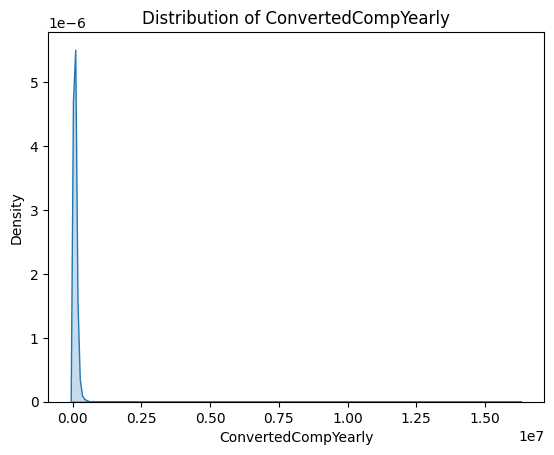

In [4]:
#seaborn KDE plot
sns.kdeplot(
    data=df,
    x='ConvertedCompYearly',
    fill=True,          # fill the area under the curve
    bw_adjust=1,        # smoothness (lower = bumpier, higher = smoother)
)
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Density')
plt.show()


In [7]:
df['ConvertedCompYearly'].describe()

count       23,435.00
mean        86,155.29
std        186,756.97
min              1.00
25%         32,712.00
50%         65,000.00
75%        107,971.50
max     16,256,603.00
Name: ConvertedCompYearly, dtype: float64

Text(0.5, 1.0, 'Box Plot of the distribution of yearly compensation')

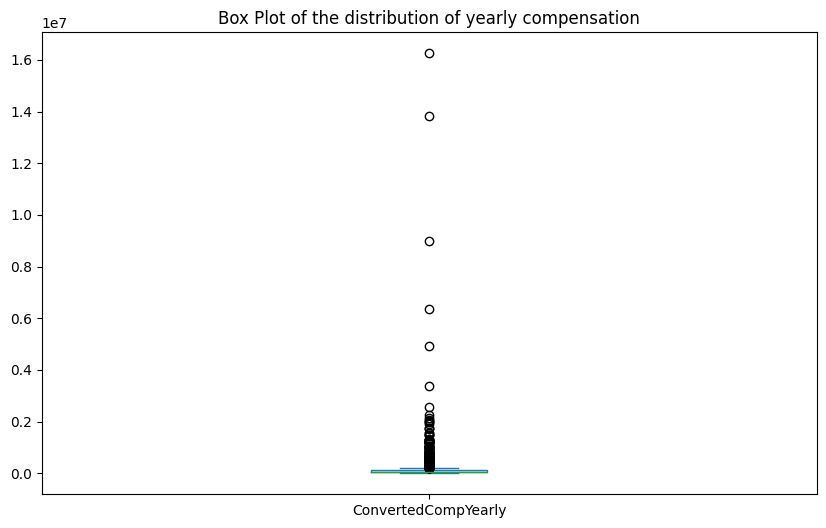

In [9]:
df['ConvertedCompYearly'].plot(kind = 'box',figsize = (10,6))
plt.title('Box Plot of the distribution of yearly compensation')

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [11]:
#filtering my data into employees that work full time and assigning it to a new df.
fulltime_df = df[df['Employment']== 'Employed, full-time']
fulltime_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65431,65432,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
median = fulltime_df['ConvertedCompYearly'].median()
print('The median of converted comp yearly of full time employes is:', median)


The median of converted comp yearly of full time employes is: 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [37]:
#defining a df for north america to view the distribution of ConvertedCompYearly in the region. 
north_america = ['United States of America', 'Mexico', 'Canada']
df_na = df.loc[df['Country'].isin(north_america), ['Country', 'ConvertedCompYearly']]
print('Out of ', df_na.shape[0], 'rows, there are ', df_na['ConvertedCompYearly'].isnull().sum(), 'null values')

Out of  13601 rows, there are  7885 null values


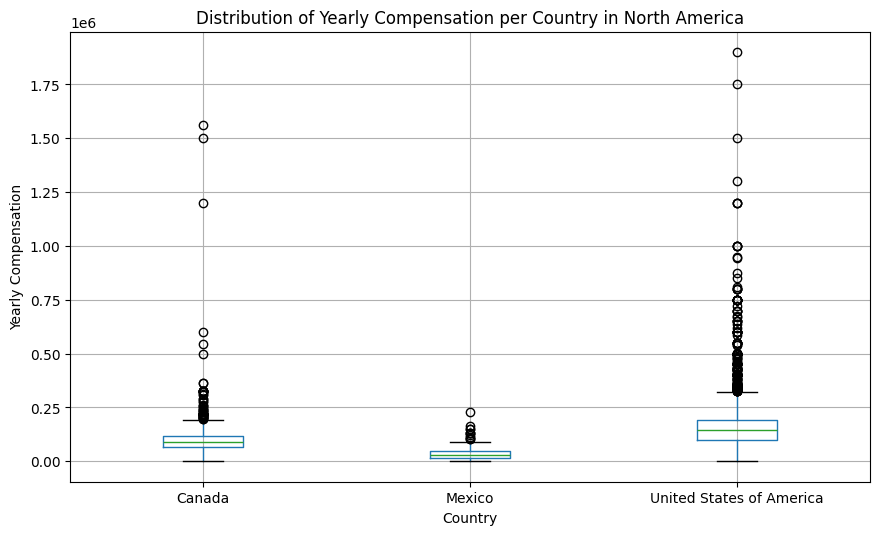

In [43]:
#Box plot of ConvertedCompYearly distribution by country in North America
df_na.boxplot(column = 'ConvertedCompYearly', 
              by = 'Country', 
              figsize = (10,6))
plt.title('Distribution of Yearly Compensation per Country in North America')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation')
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


In [45]:
####Create a new df removing outliers from the ConvertedCompYearly column.


In [52]:
#Finding the Quartile data in order to find the IQR and bounds to define outliers
df['ConvertedCompYearly'].describe()
Q1 = 32712
Q3 = 107971.5
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print('lower_bound: ',lower_bound)
print('upper_bound: ',upper_bound)

lower_bound:  -80177.25
upper_bound:  220860.75


In [53]:
#Defining the outliers as a df, by finding all values that are under the lower bound OR above the upper bound
outliers = df.loc[(df['ConvertedCompYearly']< lower_bound) | (df['ConvertedCompYearly']> upper_bound)]
outliers

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
428,429,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,25.00,25.00,25.00,Appropriate in length,Neither easy nor difficult,"230,000.00",8.00
456,457,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","School (i.e., University, College, etc)",NaN,...,10.00,10.00,0.00,0.00,0.00,0.00,Appropriate in length,Neither easy nor difficult,"300,000.00",1.00
461,462,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,20.00,50.00,0.00,10.00,10.00,0.00,Appropriate in length,Neither easy nor difficult,"254,425.00",7.00
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.00,20.00,0.00,30.00,10.00,0.00,Appropriate in length,Easy,"650,000.00",6.00
545,546,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.00,5.00,5.00,10.00,0.00,0.00,Appropriate in length,Easy,"400,000.00",8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,"750,000.00",NaN
41000,41001,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;On the job training;Other online res...,Technical documentation;Blogs;Written Tutorial...,...,60.00,50.00,0.00,80.00,50.00,0.00,Too long,Neither easy nor difficult,"235,000.00",6.00
41001,41002,I am a developer by profession,45-54 years old,"Employed, full-time;Student, part-time","Hybrid (some remote, some in-person)",Apples,School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,"260,000.00",NaN
41027,41028,I am a developer by profession,55-64 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,I don’t code outside of work,Some college/university study without earning ...,Other (please specify):,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,Appropriate in length,Neither easy nor difficult,"700,000.00",10.00


In [57]:
outliers['ConvertedCompYearly']

428     230,000.00
456     300,000.00
461     254,425.00
529     650,000.00
545     400,000.00
           ...    
40952   750,000.00
41000   235,000.00
41001   260,000.00
41027   700,000.00
41187   222,834.00
Name: ConvertedCompYearly, Length: 978, dtype: float64

In [58]:
#New df without the outliers of the ConvertedCompYearly column. 
NO_outliers = df.loc[(df['ConvertedCompYearly']> lower_bound) | (df['ConvertedCompYearly']< upper_bound)]
NO_outliers

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.00,100.00,100.00,100.00,50.00,90.00,Too long,Easy,"7,322.00",10.00
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,"30,074.00",NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.00,0.00,0.00,0.00,0.00,0.00,Too long,Difficult,"91,295.00",10.00
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,"53,703.00",NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.00,30.00,5.00,20.00,10.00,5.00,Too long,Easy,"110,000.00",10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.00,0.00,0.00,0.00,0.00,0.00,Appropriate in length,Neither easy nor difficult,"44,640.00",NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.00,10.00,20.00,15.00,0.00,0.00,Appropriate in length,Easy,"170,000.00",9.00
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,"116,844.00",NaN
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,20.00,25.00,15.00,5.00,5.00,0.00,Appropriate in length,Easy,"12,000.00",3.00


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [62]:
#Correlation between 3 key variables 
corr = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()
corr
### There is no correlation between any of these key variables. 

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.00,0.15,0.02
WorkExp,0.15,1.00,-0.03
JobSatPoints_1,0.02,-0.03,1.00


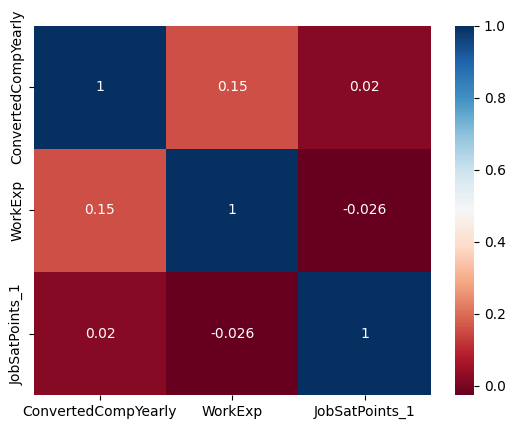

In [64]:
#heatmap
sns.heatmap(corr, annot = True, cmap= 'RdBu')
plt.show() 

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [68]:
corr1 = df[['ConvertedCompYearly', 'WorkExp']].corr()
corr1

,ConvertedCompYearly,WorkExp
ConvertedCompYearly,1.00,0.15
WorkExp,0.15,1.00


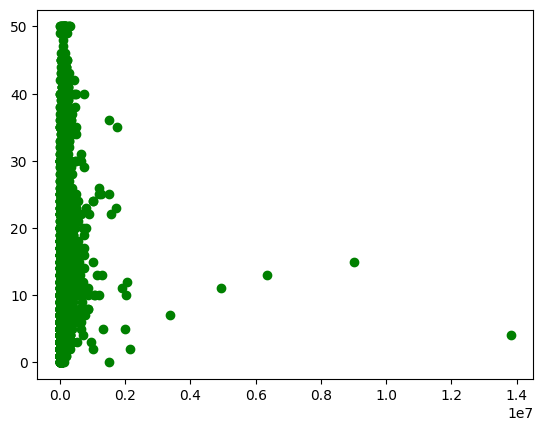

In [66]:
##Correlation using scatter plot ConvertedCompYearly - WorkExp
plt.scatter(x= df['ConvertedCompYearly'], y = df['WorkExp'], color = 'green')
plt.show()
#As there is no Linear Pattern, meaning there there is no positive/ negative correlation between these 2 variables.

In [69]:
##Correlation using scatter plot ConvertedCompYearly - JobSatPoints_1
corr2 = df[['ConvertedCompYearly', 'JobSatPoints_1']].corr()
corr2

,ConvertedCompYearly,JobSatPoints_1
ConvertedCompYearly,1.00,0.02
JobSatPoints_1,0.02,1.00


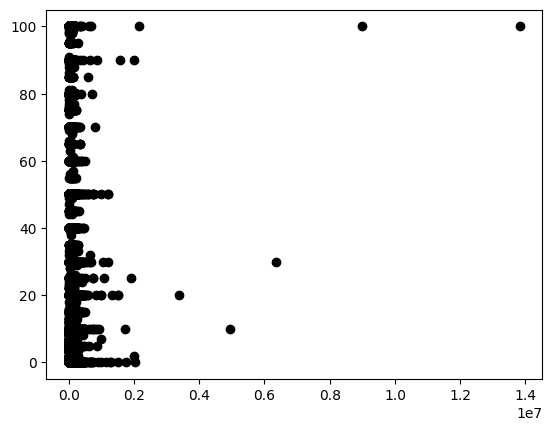

In [71]:
#scatter plot
plt.scatter(x= df['ConvertedCompYearly'], y = df['JobSatPoints_1'], color = 'black')
plt.show()
# Again there is no line

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
